In [1]:
import pandas as pd #pip install pandas 를 cmd에 입력

# 시리즈

- 1차원 배열 
- 엑셀 시트의 열 하나와 같다.
- 행이 존재(index). 컬럼은 존재하지 않는다.


In [6]:
# 리스트로 시리즈 만들기
list_data = ['a','b','c']
pd.Series(list_data, index = ["AAAA","BBBB","CCCC"])

AAAA    a
BBBB    b
CCCC    c
dtype: object

In [5]:
# 딕셔너리 시리즈
dict_data = {'a' : 1 ,'b' : 2, 'c' : 3}
pd.Series(dict_data)

a    1
b    2
c    3
dtype: int64

In [7]:
#튜플로 시리즈 만들기
tuple_data = ("2021","2022","2023")
pd.Series(tuple_data, index = ["재작년", "작년", "올해"])


재작년    2021
작년     2022
올해     2023
dtype: object

# 인덱싱

- iloc (integer lacation) - 행, 열 기준으로 인덱싱
- loc(location) - 인덱스 인덱싱

In [18]:
data = [100,200,300,400]
seriesA = pd.Series(data)

print(seriesA)

print("---------")
print("seriesA.iloc[0]: ", seriesA.iloc[0])
print("seriesA.iloc[1]: ", seriesA.iloc[1])
print("seriesA.loc[0]: ", seriesA.loc[0])

print("--------")
print("seriesA.loc[2] :",seriesA.loc[2])

0    100
1    200
2    300
3    400
dtype: int64
---------
seriesA.iloc[0]:  100
seriesA.iloc[1]:  200
seriesA.loc[0]:  100
--------
seriesA.loc[2] : 300


In [22]:
data = [100,200,300,400]
index = ["A","B","C","D"]

seriesB = pd.Series(data, index = index)
print(seriesB)

seriesB.iloc[0]


A    100
B    200
C    300
D    400
dtype: int64


100

In [30]:
#슬라이싱

data = [100,200,300,400]
index = ["A","B","C","D"]

seriesC = pd.Series(data, index = index)
print(seriesC)


seriesC.iloc[:2]

print("-------")
print(f'seriesC.loc["A":"B"]: \n {seriesC.loc["A":"B"]}')

seriesC.iloc[[0,2]]

A    100
B    200
C    300
D    400
dtype: int64
-------
seriesC.loc["A":"B"]: 
 A    100
B    200
dtype: int64


A    100
C    300
dtype: int64

In [44]:
#데이터 추가 수정 삭제

data = [100,200,300,400]
index = ["A","B","C","D"]

seriesC = pd.Series(data, index = index)
print(seriesC)

seriesC.loc['B'] = 500 #인덱스 기준 수정

print(seriesC)

seriesC.iloc[3] = 600 # 행 인덱스 기준 수정

print(seriesC)

seriesC.loc['E'] = 700 # 인덱스 기준 추가

print(seriesC)

# 행을 통해 추가 (iloc로는 추가할 수없다.)

seriesD = seriesC.drop('B') #B인덱스 제거
print(seriesD)

A    100
B    200
C    300
D    400
dtype: int64
A    100
B    500
C    300
D    400
dtype: int64
A    100
B    500
C    300
D    600
dtype: int64
A    100
B    500
C    300
D    600
E    700
dtype: int64
A    100
C    300
D    600
E    700
dtype: int64


In [51]:
#시리즈 연산

students = ['철수','영희','민수']
mid_grades = [90,98,70]
final_grades = [49,92,85]
mid_series = pd.Series(mid_grades, index=students)
final_series = pd.Series(final_grades, index=students)

# mid_series, final_series

all_series = mid_series + final_series
diff_series = final_series - mid_series
diff_series

철수   -41
영희    -6
민수    15
dtype: int64

In [55]:
sport_users =  {
    "손흥민 " : "축구선수", 
    "김연아" : "피겨스케이팅",
    "서장훈" : "농구선수",
    "박지성" : "축구선수",
    "황희찬" : "축구선수",
    "류현진" : "야구선수"
}

series = pd.Series(sport_users)
#series
 
series.unique() #유니크한 값들 추출
series.value_counts() #유니크한 값들에 대해서 갯수(빈도수) 반환

축구선수      3
피겨스케이팅    1
농구선수      1
야구선수      1
Name: count, dtype: int64

In [58]:
series = pd.Series([11,23,41])

# new_series = series /2 

def divide(x) :
    return x /2

new_series = series.map(divide)
new_series

0     5.5
1    11.5
2    20.5
dtype: float64

In [59]:
#문자열
series = pd.Series(['철수','영희','민지'])

#각각 시리즈엦 00안녕 이렇게 
def hi(name) :
    return name+"안녕"

new_series = series.map(hi)
new_series

0    철수안녕
1    영희안녕
2    민지안녕
dtype: object

In [60]:
series = pd.Series(["$21.02, $23.11, $192.34"])

#문자열이 아니라 float 형태로 바꾸기

def change_float(v) :
    #return v.replace("$","")
    return v[1::]

new_series

NameError: name 'remove' is not defined

In [61]:
#필터링
series = pd.Series([10000,12000,13000,12500,15000])
series[series >12500]

2    13000
4    15000
dtype: int64

In [68]:
#정렬
series = pd.Series([1.2,2.1,5.8,1.7,4.3])

series.sort_values() #오름차순
series.sort_values(ascending = False).reset_index(drop=True) #내림차순

0    5.8
1    4.3
2    2.1
3    1.7
4    1.2
dtype: float64

# 데이터 프레임


In [69]:
import numpy as np

In [72]:
#arange 사용해서 [1,2,3,4] -> [[1,2].[3,4]]

data = np.arange(1,5).reshape(2,2)
data

df = pd.DataFrame(data, index = ['A','B'], columns = ['C','D'])
df


,C,D
A,1,2
B,3,4


In [74]:
data2 = np.arange(5,9).reshape(2,2)
data2

df2 = pd.DataFrame(data2, index = ['A','B'], columns = ['C','D'])

In [76]:
df - df2

,C,D
A,-4,-4
B,-4,-4


# 타이타닉 데이터셋 분석

In [78]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
# 상단 데이터 추출
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [82]:
# 마지막 데이터 추출
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [83]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [85]:
titanic.shape

(891, 12)

In [86]:
titanic.describe() # 각 열 (숫자타입)에 대해서 간단개요를 정리해서 보여준다
# 문자열은 처리하지 않는다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.834734,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.633076,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,92.000000,8.000000,6.000000,512.329200


In [88]:
#슬라이싱
#세 번째 행 다섯 번째 열 에 있는 거 찾기
titanic.iloc[2,4]


'female'

In [89]:
# dtypes 
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [95]:
# 수치형 데이터만 
new_titanic =  titanic.select_dtypes(exclude = "object")
new_titanic.dtypes

new_titanic2 = new_titanic.select_dtypes(include = "int64")
new_titanic2

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [96]:
#결손값(Nan)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
#titanic.isnull() #각 항목이 null인지 체크
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
titanic["Embarked"].unique()
#NaN을 S 값으로 채우기

titanic.loc[titanic["Embarked"].isna(), "Embarked"] = "S"

titanic["Embarked"].unique()

titanic.to_csv("titanic2.csv")

In [106]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [109]:
#타입 바꾸기
titanic["Age"].fillna(-1).astype("int64").replace({ -1 : None})


0        22
1        38
2        26
3        35
4        35
       ... 
886      27
887      19
888    None
889      26
890      32
Name: Age, Length: 891, dtype: object

In [110]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [120]:
# FareWon = Fare * 1389.2

#titanic.loc[:,'FareWon'] = '₩' + (titanic["Fare"]*1389.2).astype('string')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareWon
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,₩10071.7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,₩99026.76036
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,₩11009.41
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,₩73766.52
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,₩11183.060000000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,₩18059.600000000002
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,₩41676.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,₩32576.74
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,₩41676.0


In [124]:
# 그룹핑
titanic 

titanic['Age'].mean() #평균값
titanic['Age'].max() #최댓값
titanic['Age'].min() #최솟값

1.0

In [127]:
#성별에 따른 나이 평균값

titanic[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.940397


In [128]:
#논리적 인덱싱
#탑승 등급, 성별, 나이
#탑승 등급 별, 성별 별 -> 나이 평균 

titanic[['Pclass','Age', 'Sex']].groupby(['Pclass','Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    42.178218
2      female  28.716216
       male    30.828283
3      female  21.754902
       male    26.498024

In [129]:
#탑승 등급, 성별에 따른 인원수(value_counts())

titanic[['Pclass','Sex']].groupby(['Pclass','Sex']).value_counts()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: count, dtype: int64

In [131]:
#탑승 등급, 성별에 따른 생존자 수 (Servived)

titanic[['Pclass','Sex','Survived']].groupby(['Pclass', 'Sex']).sum()


Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

In [132]:
#논리적 인덱싱
#20살 미만의 승객의 이름과 나이 
# df.loc(조건, 열레이블) 

titanic.loc[titanic["Age"]<20, ["Name", "Age"]]



,Name,Age
7,"Palsson, Master. Gosta Leonard",2.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
10,"Sandstrom, Miss. Marguerite Rut",4.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.0
16,"Rice, Master. Eugene",2.0
...,...,...
855,"Aks, Mrs. Sam (Leah Rosen)",18.0
869,"Johnson, Master. Harold Theodor",4.0
875,"Najib, Miss. Adele Kiamie ""Jane""",15.0
877,"Petroff, Mr. Nedelio",19.0


In [135]:
titanic.loc[(titanic["Age"]<20)  & (titanic["Embarked"] =='S'), ["Name", "Age"]]


,Name,Age
7,"Palsson, Master. Gosta Leonard",2.0
10,"Sandstrom, Miss. Marguerite Rut",4.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.0
24,"Palsson, Miss. Torborg Danira",8.0
27,"Fortune, Mr. Charles Alexander",19.0
...,...,...
853,"Lines, Miss. Mary Conover",16.0
855,"Aks, Mrs. Sam (Leah Rosen)",18.0
869,"Johnson, Master. Harold Theodor",4.0
877,"Petroff, Mr. Nedelio",19.0


In [136]:
#논리적 인덱싱
#20살 미만의 승객의 이름과 나이 
# df.loc(조건, 열레이블) 

titanic_s = titanic.loc[(titanic["Age"]<20)  & (titanic["Embarked"] =='S'), ["Name", "Age"]]

In [138]:
titanic_s.sort_values(by ="Age").reset_index(drop=True)

,Name,Age
0,"Panula, Master. Eino Viljami",1.0
1,"Dean, Master. Bertram Vere",1.0
2,"Becker, Master. Richard F",1.0
3,"Goodwin, Master. Sidney Leonard",1.0
4,"Johnson, Miss. Eleanor Ileen",1.0
...,...,...
119,"Patchett, Mr. George",19.0
120,"Cor, Mr. Liudevit",19.0
121,"Dakic, Mr. Branko",19.0
122,"Johnson, Mr. William Cahoone Jr",19.0


In [139]:
import matplotlib.pyplot as plt

<Axes: xlabel='name'>

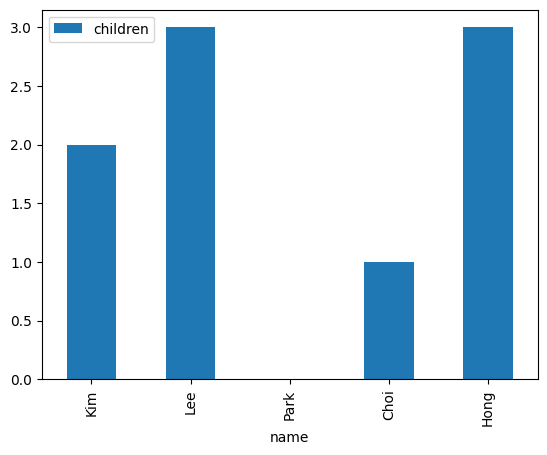

In [141]:
df = pd.DataFrame({
    'name' : ['Kim','Lee','Park', 'Choi','Hong'],
    'age' : [22,26,70,17,28],
    'city' : ['Seoul', 'Busan', 'Seoul', 'Daegue','Seoul'],
    'children' : [2,3,0,1,3],
    'pets' : [0,1,0,2,3]
})

df.plot(kind = 'bar', x = 'name', y = 'children')